In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose 
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA

In [127]:
dataframe =pd.read_csv("alg.csv")

In [128]:
dataframe['date']=pd.to_datetime(dataframe['date'])

In [129]:
dataframe.set_index('date',inplace=True)

In [130]:
dataframe=dataframe.interpolate(methode='time')

In [131]:
y=dataframe.resample('M').mean()


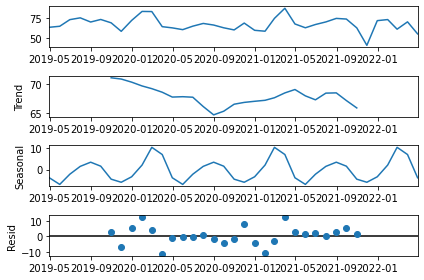

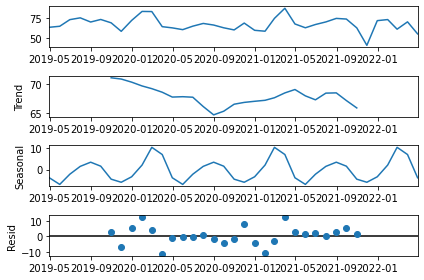

In [7]:
decomposition = seasonal_decompose(y, model='additive',period=12)


decomposition.plot()


In [8]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

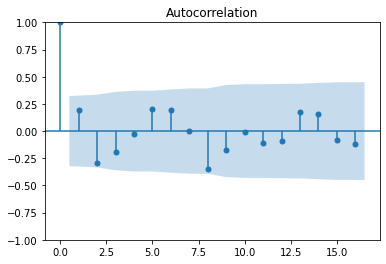

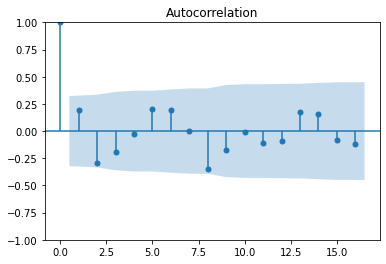

In [9]:
plot_acf(y)

C:\Users\djallel\anaconda3\envs\djallel\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


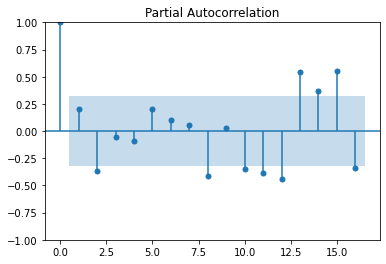

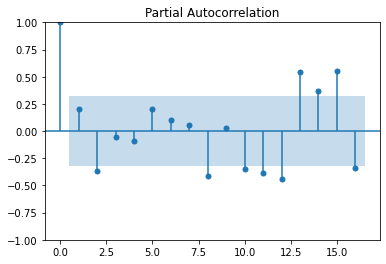

In [10]:
plot_pacf(y)

In [56]:
y[29:]

,pm25
date,
2021-09-30,74.100000
2021-10-31,62.741935
2021-11-30,40.250000
2021-12-31,72.050000
2022-01-31,73.428571
2022-02-28,61.041667
2022-03-31,70.483871
2022-04-30,55.000000


In [132]:
train_end = datetime(2021,8,31)
test_end = datetime(2022,4,30)

train_data = y[:train_end]
test_data = y[train_end + timedelta(days=1):test_end]

In [13]:
my_order = (3,0,1)
my_seasonal_order = (2, 0, 0, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

In [14]:
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

C:\Users\djallel\anaconda3\envs\djallel\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Model Fitting Time: 1.0937044620513916


C:\Users\djallel\anaconda3\envs\djallel\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Production')

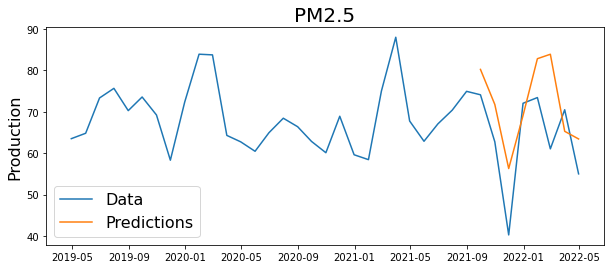

In [19]:
plt.figure(figsize=(10,4))
plt.plot(y)


plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('PM2.5', fontsize=20)
plt.ylabel('Production', fontsize=16)

In [21]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 2021-09-30 00:00:00   NaN
2021-10-31 00:00:00   NaN
2021-11-30 00:00:00   NaN
2021-12-31 00:00:00   NaN
2022-01-31 00:00:00   NaN
2022-02-28 00:00:00   NaN
2022-03-31 00:00:00   NaN
2022-04-30 00:00:00   NaN
 pm25                 NaN
dtype: float64


C:\Users\djallel\anaconda3\envs\djallel\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [24]:
predc=[]
for train_end in test_data.index:
    train_data = y[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    predc.append(pred)

C:\Users\djallel\anaconda3\envs\djallel\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\djallel\anaconda3\envs\djallel\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\djallel\anaconda3\envs\djallel\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\djallel\anaconda3\envs\djallel\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\d

In [37]:
predictions=(np.diag(pd.DataFrame(predc)))

In [133]:
predictions

array([80.23093662, 68.12249844, 55.04333659, 57.65959122, 93.70852718,
       69.62732471, 52.63737763, 73.07188922])

In [41]:
test_data['pm25_pred']=predictions

<ipython-input-41-74145888fa4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pm25_pred']=predictions


In [134]:
test_data

,pm25
date,
2021-09-30,74.100000
2021-10-31,62.741935
2021-11-30,40.250000
2021-12-31,72.050000
2022-01-31,73.428571
2022-02-28,61.041667
2022-03-31,70.483871
2022-04-30,55.000000


In [70]:
rolling_residuals = np.diff(np.asarray(test_data), axis = 1)

Text(0, 0.5, 'PM2.5')

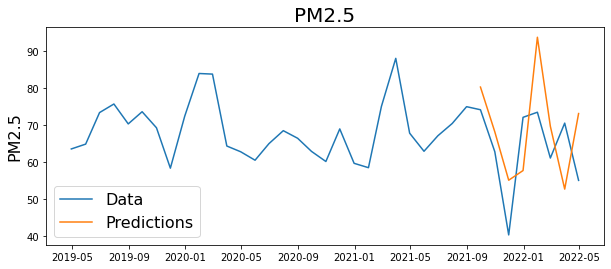

In [43]:
plt.figure(figsize=(10,4))

plt.plot(y)
plt.plot(test_data['pm25_pred'])

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('PM2.5', fontsize=20)
plt.ylabel('PM2.5', fontsize=16)



In [122]:
test_data[:,0]

<tf.Tensor: shape=(107, 3, 1), dtype=float64, numpy=
array([[[-0.2       ],
        [ 0.32142857],
        [ 0.00714286]],

       [[-0.23571429],
        [ 0.31428571],
        [-0.00714286]],

       [[-0.28571429],
        [ 0.25714286],
        [-0.35714286]],

       [[-0.26428571],
        [ 0.22142857],
        [-0.35      ]],

       [[-0.25714286],
        [ 0.19285714],
        [-0.25714286]],

       [[-0.19285714],
        [ 0.22857143],
        [-0.16428571]],

       [[-0.07857143],
        [ 0.37857143],
        [-0.01428571]],

       [[-0.22857143],
        [ 0.37857143],
        [-0.05      ]],

       [[-0.30714286],
        [ 0.3       ],
        [-0.12857143]],

       [[-0.21428571],
        [ 0.31428571],
        [-0.12857143]],

       [[-0.17142857],
        [ 0.37142857],
        [-0.07857143]],

       [[-0.27142857],
        [ 0.32857143],
        [-0.22142857]],

       [[-0.16428571],
        [ 0.39285714],
        [-0.15714286]],

       [[-0.33571429],
 

In [135]:
mae=mean_absolute_error(test_data,predictions)

In [136]:
print(mae)

13.184905161717882


In [73]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 17.70360799082967


Now We gonna to introduce our deepLearning model!

In [75]:
X1=dataframe.copy()
Channels1=X1.diff()
Channels1=Channels1.dropna()
Channels2=X1.diff(365)
Channels1=Channels1[364:]
Channels2=Channels2.dropna()

In [77]:
len(Channels2)

581

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X1)
ch1 = scaler.transform(Channels1)

In [79]:
ch3 = scaler.transform(Channels2)

In [118]:
X1

<KerasTensor: shape=(None, 12, 300) dtype=float32 (created by layer 'bidirectional')>

In [80]:
ch2 = scaler.transform(X1[365:])

In [81]:
def to_supervised(data,dropNa = True,lag=12):
    df = pd.DataFrame(data)
    column = []
    column.append(df)
    for i in range(1,13):
        column.append(df.shift(-i))
    df = pd.concat(column,axis=1)
    df.dropna(inplace = True)
    features = 1
    df = df.values
    supervised_data = df[:,:1*12]

    return supervised_data

In [82]:
timeSteps = 12
supervised1 = to_supervised(pd.DataFrame(ch1),timeSteps)


In [83]:
supervised1.shape

(569, 12)

In [84]:
# spiltting the data
# training on only first year data
features = 1
train_hours = 450
X = supervised1[:,:(features*timeSteps)]

x_train1 = X[:train_hours,:]
x_test1 = X[train_hours:len(X)-timeSteps,:]

print (x_train1.shape,x_test1.shape)

(450, 12) (107, 12)


In [85]:
supervised2 = to_supervised(pd.DataFrame(ch2),timeSteps)

In [86]:
# spiltting the data
# training on only first year data

X = supervised2[:,:(features*timeSteps)]

x_train2 = X[:train_hours,:]
x_test2 = X[train_hours:len(X)-timeSteps,:]

print (x_train2.shape,x_test2.shape)

(450, 12) (107, 12)


In [87]:
supervised3 = to_supervised(pd.DataFrame(ch3),timeSteps)

X = supervised3[:,:(features*timeSteps)]
print(X.shape)
x_train3 = X[:train_hours,:]
x_test3 = X[train_hours:len(X)-timeSteps,:]

print (x_train3.shape,x_test3.shape)

(569, 12)
(450, 12) (107, 12)


In [88]:
X_train1 = x_train1.reshape(x_train1.shape[0], timeSteps, features)
X_test1 = x_test1.reshape(x_test1.shape[0], timeSteps, features)

In [89]:
X_train2 = x_train2.reshape(x_train2.shape[0], timeSteps, features)
X_test2 = x_test2.reshape(x_test2.shape[0], timeSteps, features)

In [90]:
X_train3 = x_train3.reshape(x_train3.shape[0], timeSteps, features)
X_test3 = x_test3.reshape(x_test3.shape[0], timeSteps, features)

In [91]:
import tensorflow as tf

In [92]:
train_data=tf.convert_to_tensor((X_train1,X_train2,X_train3))

In [93]:
test_data=tf.convert_to_tensor((X_test1,X_test2,X_test3))

In [94]:
y = X1[377:]

y=scaler.transform(y)

In [95]:
y_train = y[:train_hours]
y_test = y[train_hours:len(y)-timeSteps]

In [96]:
len(y_train)

450

In [97]:
train_data=tf.transpose(train_data,[1,2,0,3])
test_data=tf.transpose(test_data,[1,2,0,3])

In [98]:
train_data.shape

TensorShape([450, 12, 3, 1])

In [99]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling1D, LSTM,Conv3D,Conv1D,TimeDistributed

In [100]:
first_channel = tf.keras.Input(shape=(12,3,1))

FC=TimeDistributed(Conv1D(128,1,padding='same',activation='relu'))(first_channel)
FCs=TimeDistributed(Conv1D(64,1,padding='same',activation='relu'))(FC)
FCss=TimeDistributed(Conv1D(64,1,padding='same',activation='relu'))(FCs)
#Max=TimeDistributed(MaxPooling1D(pool_size=2))(FCss)
Drop=Dropout(0.5)(FCss)

FCc=TimeDistributed(Flatten())(Drop)


X1=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,  return_sequences=True))(FCc)

X2=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,  return_sequences=False))(X1)



X11=Dense(1)(X2)

In [101]:
model=tf.keras.Model(first_channel,X11)

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 3, 1)]        0         
                                                                 
 time_distributed (TimeDistr  (None, 12, 3, 128)       256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 12, 3, 64)        8256      
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 12, 3, 64)        4160      
 tributed)                                                       
                                                                 
 dropout (Dropout)           (None, 12, 3, 64)         0         
                                                             

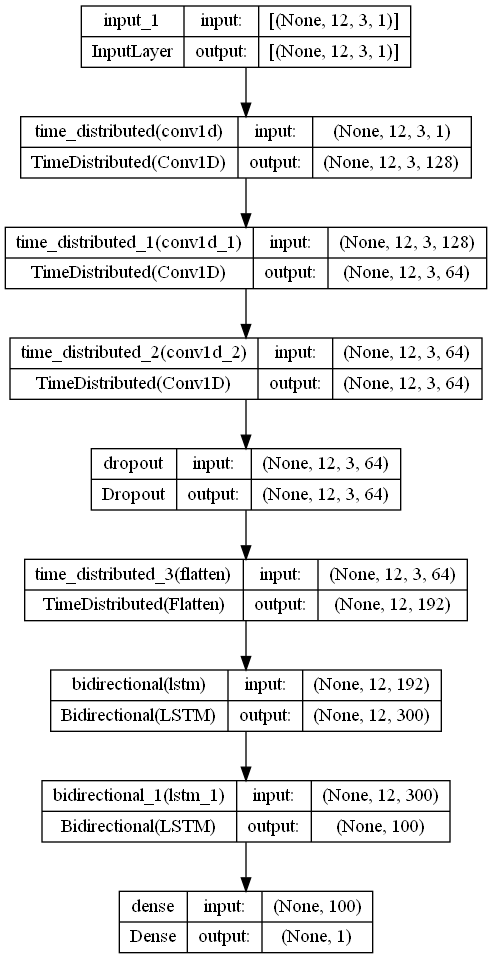

In [115]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [102]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=100, restore_best_weights=True)

with tf.device('/GPU:0'):
    history = model.fit(train_data,y_train, validation_data=(test_data,y_test),epochs=2000, shuffle=False,callbacks=[ early_stopping])

Epoch 1/2000
15/15 [==============================] - 24s 373ms/step - loss: 0.0267 - val_loss: 0.0063
Epoch 2/2000
15/15 [==============================] - 1s 80ms/step - loss: 0.0159 - val_loss: 0.0053
Epoch 3/2000
15/15 [==============================] - 1s 82ms/step - loss: 0.0127 - val_loss: 0.0052
Epoch 4/2000
15/15 [==============================] - 1s 78ms/step - loss: 0.0116 - val_loss: 0.0057
Epoch 5/2000
15/15 [==============================] - 1s 82ms/step - loss: 0.0114 - val_loss: 0.0060
Epoch 6/2000
15/15 [==============================] - 1s 84ms/step - loss: 0.0106 - val_loss: 0.0068
Epoch 7/2000
15/15 [==============================] - 1s 83ms/step - loss: 0.0111 - val_loss: 0.0060
Epoch 8/2000
15/15 [==============================] - 1s 86ms/step - loss: 0.0097 - val_loss: 0.0051
Epoch 9/2000
15/15 [==============================] - 1s 93ms/step - loss: 0.0097 - val_loss: 0.0057
Epoch 10/2000
15/15 [==============================] - 1s 79ms/step - loss: 0.0096 - val_

Epoch 161/2000
15/15 [==============================] - 1s 81ms/step - loss: 0.0057 - val_loss: 0.0043
Epoch 162/2000
15/15 [==============================] - 1s 80ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 163/2000
15/15 [==============================] - 1s 88ms/step - loss: 0.0055 - val_loss: 0.0039
Epoch 164/2000
15/15 [==============================] - 1s 84ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 165/2000
15/15 [==============================] - 1s 82ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 166/2000
15/15 [==============================] - 1s 81ms/step - loss: 0.0052 - val_loss: 0.0042
Epoch 167/2000
15/15 [==============================] - 1s 83ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 168/2000
15/15 [==============================] - 1s 86ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 169/2000
15/15 [==============================] - 1s 84ms/step - loss: 0.0055 - val_loss: 0.0045
Epoch 170/2000
15/15 [==============================] - 1s 84ms/step - lo

In [103]:
model.evaluate(test_data,y_test)


4/4 [==============================] - 0s 25ms/step - loss: 0.0037


0.0037394899409264326

In [104]:
prediction=model.predict(test_data)

4/4 [==============================] - 4s 20ms/step


In [105]:
df_predi=pd.DataFrame(y_test)

rev_trans=scaler.inverse_transform(df_predi)

df_final=pd.DataFrame(rev_trans)

In [106]:
rev_trans1=scaler.inverse_transform(prediction)


In [107]:
df_final[["PM2.5_pred"]]=rev_trans1


In [108]:
df_final

,0,PM2.5_pred
0,87.0,78.654411
1,72.0,85.440163
2,65.0,75.646690
3,59.0,69.537285
4,65.0,63.091129
...,...,...
102,71.0,70.494812
103,69.0,70.933800
104,75.0,70.233902
105,73.0,73.667625


<AxesSubplot:>

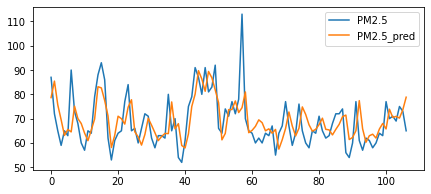

In [120]:
df_final.rename(columns = {0:'PM2.5'}, inplace = True)
df_final[['PM2.5',"PM2.5_pred"]].plot(figsize=(7,3))


In [110]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(df_final[0], df_final["PM2.5_pred"]))
print('Test Score: %.2f RMSE' % (testScore))
#calculate mean aboslute error
mae=mean_absolute_error(df_final[0],df_final["PM2.5_pred"])
print('\nMae Score: %.2f ' % (mae))

Test Score: 8.56 RMSE

Mae Score: 6.66 


In [111]:
test_series = df_final[0]
# state of model performance
if testScore < test_series.std():
    print('\n[ Model performance is GOOD enough ]')
    print('\nRMSE of test prediction < Standard deviation of test dataset')
    print('%.2f' % (testScore), '<', '%.2f' % (test_series.std()))
else:
    print('\n[ Model performance is NOT GOOD enough ]')
    print('\nRMSE of test prediction > Standard deviation of test dataset')
    print('%.2f' % (testScore), '>', '%.2f' % (test_series.std()))


[ Model performance is GOOD enough ]

RMSE of test prediction < Standard deviation of test dataset
8.56 < 10.37


Text(0, 0.5, 'mse score')

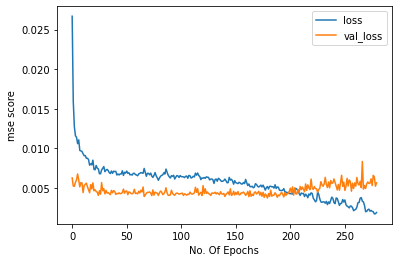

In [112]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")

In [113]:
model.save('./modelDzuni-Uni')


INFO:tensorflow:Assets written to: ./modelDzuni-Uni\assets


INFO:tensorflow:Assets written to: ./modelDzuni-Uni\assets
